In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

In [55]:

train = pd.read_csv('C:\\Users\\user\\workspace\\movie\\movies_train.csv')
test = pd.read_csv('C:\\Users\\user\\workspace\\movie\movies_test.csv')
submission = pd.read_csv('C:\\Users\\user\\workspace\\movie\\submission.csv')

EDA 및 전처리

In [56]:
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [57]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [58]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.000000,1.070000e+02,243.000000,243.000000,243.000000
mean,109.798354,8.916695e+05,0.851852,159.316872,3.477366
std,124.022711,1.217341e+06,1.200321,162.976607,2.111192
min,40.000000,3.400000e+01,0.000000,0.000000,0.000000
25%,91.000000,6.250200e+04,0.000000,18.000000,2.000000
50%,104.000000,4.931200e+05,0.000000,105.000000,3.000000
75%,114.500000,1.080850e+06,1.000000,282.000000,4.000000
max,2015.000000,6.173100e+06,6.000000,776.000000,16.000000


In [59]:
train.dir_prev_bfnum.fillna(0, inplace=True) #결측값 0으로 변경
test.dir_prev_bfnum.fillna(0, inplace=True)

<AxesSubplot:>

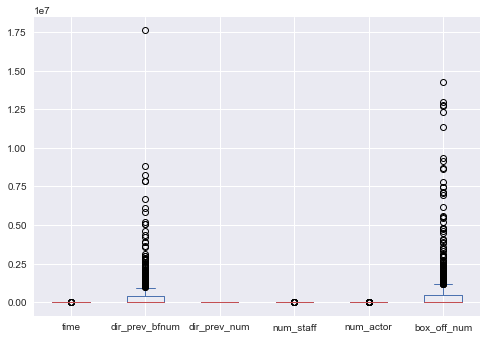

In [60]:
plt.style.use('seaborn')
train.plot(kind='box')

<AxesSubplot:>

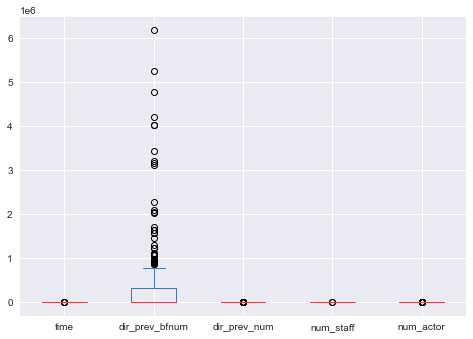

In [61]:
test.plot(kind='box')

In [62]:
q1 = train['box_off_num'].quantile(0.25)
q3 = train['box_off_num'].quantile(0.75)
iqr = q3 - q1

In [63]:
condition = (train['box_off_num'] < q1 - 1.5 * iqr) | (train['box_off_num'] > q3 + 1.5 * iqr)

In [64]:
train[condition].index

Int64Index([  1,   2,  16,  20,  34,  39,  44,  59,  63,  66,  74,  81,  86,
             90,  91, 100, 101, 110, 112, 116, 118, 122, 124, 128, 139, 166,
            169, 178, 181, 190, 201, 208, 209, 214, 219, 220, 226, 244, 267,
            278, 287, 288, 297, 320, 322, 326, 360, 361, 362, 372, 377, 381,
            382, 388, 393, 397, 398, 399, 409, 412, 422, 429, 434, 442, 445,
            455, 458, 460, 466, 467, 472, 476, 477, 478, 485, 486, 487, 491,
            494, 496, 498, 505, 507, 517, 520, 530, 536, 539, 547, 561, 568,
            588, 592, 595, 596, 598, 599],
           dtype='int64')

In [65]:
train.drop(train[condition].index, inplace=True) #이상값 삭제

In [66]:
q1 = train['dir_prev_bfnum'].quantile(0.25)
q3 = train['dir_prev_bfnum'].quantile(0.75)
iqr = q3 - q1

In [67]:
condition1 = (train['dir_prev_bfnum'] < q1 - 1.5 * iqr) | (train['dir_prev_bfnum'] > q3 + 1.5 * iqr)

In [68]:
train[condition1].index

Int64Index([  5,   7,  12,  13,  41,  48,  50,  51,  60,  61,
            ...
            531, 535, 543, 548, 551, 564, 566, 570, 576, 584],
           dtype='int64', length=110)

In [69]:
train.drop(train[condition1].index, inplace=True) #이상값 삭제

In [70]:
q1 = train['time'].quantile(0.25)
q3 = train['time'].quantile(0.75)
iqr = q3 - q1

In [71]:
condition2 = (train['time'] < q1 - 1.5 * iqr) | (train['time'] > q3 + 1.5 * iqr)

In [72]:
train[condition2].index

Int64Index([111, 257, 353, 365, 425, 438, 545], dtype='int64')

In [73]:
train.drop(train[condition2].index, inplace=True) #이상값 삭제

In [74]:
q1 = train['num_staff'].quantile(0.25)
q3 = train['num_staff'].quantile(0.75)
iqr = q3 - q1

In [75]:
condition3 = (train['num_staff'] < q1 - 1.5 * iqr) | (train['num_staff'] > q3 + 1.5 * iqr)

In [76]:
train[condition3].index

Int64Index([ 18,  23,  30,  47,  55,  58, 105, 119, 146, 180, 184, 192, 200,
            270, 273, 330, 350, 417, 420, 446, 463, 489, 512, 513, 537, 540,
            559, 589],
           dtype='int64')

In [77]:
train.drop(train[condition3].index, inplace=True) #이상값 삭제

In [78]:
q1 = train['num_actor'].quantile(0.25)
q3 = train['num_actor'].quantile(0.75)
iqr = q3 - q1

In [79]:
condition4 = (train['num_actor'] < q1 - 1.5 * iqr) | (train['num_actor'] > q3 + 1.5 * iqr)

In [80]:
train[condition4].index

Int64Index([ 19,  26,  32,  52,  53,  56,  80, 108, 130, 148, 196, 203, 246,
            264, 272, 302, 363, 371, 511, 525, 528, 574, 582],
           dtype='int64')

In [81]:
train.drop(train[condition4].index, inplace=True) #이상값 삭제

In [82]:
q1 = train['dir_prev_num'].quantile(0.25)
q3 = train['dir_prev_num'].quantile(0.75)
iqr = q3 - q1

In [83]:
condition5 = (train['dir_prev_num'] < q1 - 1.5 * iqr) | (train['dir_prev_num'] > q3 + 1.5 * iqr)

In [84]:
train[condition5].index

Int64Index([  3,   4,  17,  45,  54,  68,  70,  71,  73,  79,  88,  89,  98,
            104, 114, 138, 144, 151, 160, 164, 170, 176, 179, 186, 193, 198,
            202, 224, 238, 241, 245, 247, 251, 258, 263, 289, 300, 305, 334,
            337, 342, 343, 344, 346, 351, 359, 367, 376, 392, 394, 403, 405,
            411, 423, 428, 430, 464, 465, 474, 493, 519, 529, 544, 552, 563,
            569, 578, 581, 583, 587],
           dtype='int64')

In [85]:
train.drop(train[condition5].index, inplace=True) #이상값 삭제

<AxesSubplot:>

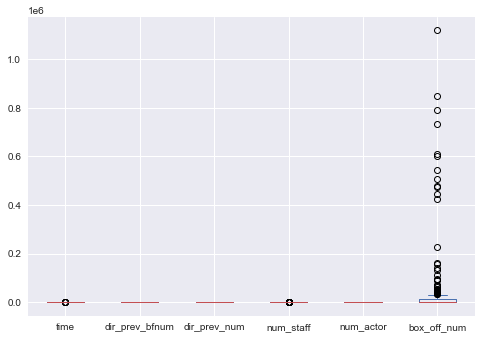

In [86]:
train.plot(kind='box')

In [87]:
q1 = test['dir_prev_num'].quantile(0.25)
q3 = test['dir_prev_num'].quantile(0.75)
iqr = q3 - q1

In [88]:
condition6 = (test['dir_prev_num'] < q1 - 1.5 * iqr) | (test['dir_prev_num'] > q3 + 1.5 * iqr)

In [89]:
test[condition6].index

Int64Index([  1,   2,  22,  58,  66,  68,  74,  76,  93, 111, 119, 134, 154,
            166, 170, 174, 183, 185, 196, 204, 205, 207, 212, 222, 229, 230,
            231, 233],
           dtype='int64')

In [90]:
test.drop(test[condition6].index, inplace=True) #이상값 삭제

In [91]:
q1 = test['dir_prev_num'].quantile(0.25)
q3 = test['dir_prev_num'].quantile(0.75)
iqr = q3 - q1

In [92]:
condition6 = (test['dir_prev_num'] < q1 - 1.5 * iqr) | (test['dir_prev_num'] > q3 + 1.5 * iqr)

In [93]:
test[condition6].index

Int64Index([], dtype='int64')

In [94]:
test.drop(test[condition6].index, inplace=True) #이상값 삭제

In [95]:
q1 = test['time'].quantile(0.25)
q3 = test['time'].quantile(0.75)
iqr = q3 - q1

In [96]:
condition7 = (test['time'] < q1 - 1.5 * iqr) | (test['time'] > q3 + 1.5 * iqr)

In [97]:
test[condition7].index

Int64Index([33, 130, 140, 224], dtype='int64')

In [98]:
test.drop(test[condition7].index, inplace=True) #이상값 삭제

In [99]:
q1 = test['dir_prev_bfnum'].quantile(0.25)
q3 = test['dir_prev_bfnum'].quantile(0.75)
iqr = q3 - q1

In [100]:
condition8 = (test['dir_prev_bfnum'] < q1 - 1.5 * iqr) | (test['dir_prev_bfnum'] > q3 + 1.5 * iqr)

In [101]:
test[condition8].index

Int64Index([  0,   3,  10,  11,  14,  15,  23,  25,  43,  45,  48,  53,  60,
             70,  86,  89,  94, 100, 104, 106, 108, 112, 135, 137, 142, 145,
            148, 149, 158, 161, 162, 163, 165, 178, 179, 184, 189, 199, 209,
            213, 216, 220, 221, 227, 232, 236],
           dtype='int64')

In [102]:
test.drop(test[condition8].index, inplace=True) #이상값 삭제

In [103]:
q1 = test['num_staff'].quantile(0.25)
q3 = test['num_staff'].quantile(0.75)
iqr = q3 - q1

In [104]:
condition9 = (test['num_staff'] < q1 - 1.5 * iqr) | (test['num_staff'] > q3 + 1.5 * iqr)

In [105]:
test[condition9].index

Int64Index([159, 195, 197, 206, 211], dtype='int64')

In [106]:
test.drop(test[condition9].index, inplace=True) #이상값 삭제

In [107]:
q1 = test['num_actor'].quantile(0.25)
q3 = test['num_actor'].quantile(0.75)
iqr = q3 - q1

In [108]:
condition10 = (test['num_actor'] < q1 - 1.5 * iqr) | (test['num_actor'] > q3 + 1.5 * iqr)

In [109]:
test[condition10].index

Int64Index([12, 19, 32, 40, 62, 71, 92, 153], dtype='int64')

In [110]:
test.drop(test[condition10].index, inplace=True) #이상값 삭제

In [111]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,265.000000,265.0,265.0,265.000000,265.000000,2.650000e+02
mean,92.860377,0.0,0.0,51.905660,3.173585,4.064162e+04
std,14.420870,0.0,0.0,61.108406,1.614347,1.384360e+05
min,60.000000,0.0,0.0,0.000000,0.000000,1.000000e+00
25%,83.000000,0.0,0.0,5.000000,2.000000,6.780000e+02
50%,92.000000,0.0,0.0,26.000000,3.000000,2.296000e+03
75%,100.000000,0.0,0.0,77.000000,4.000000,1.311300e+04
max,133.000000,0.0,0.0,253.000000,7.000000,1.118258e+06


In [112]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,97.539474,7972.680921,0.243421,95.361842,3.098684
std,15.053495,32017.600662,0.551899,105.790280,1.525761
min,60.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,0.000000,0.000000,11.000000,2.000000
50%,97.500000,0.000000,0.000000,54.500000,3.000000
75%,107.000000,0.000000,0.000000,145.750000,4.000000
max,135.000000,196839.000000,2.000000,380.000000,7.000000


In [113]:
corr = train.corr()
corr

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,NaN,NaN,0.362355,0.075402,0.244141
dir_prev_bfnum,NaN,NaN,NaN,NaN,NaN,NaN
dir_prev_num,NaN,NaN,NaN,NaN,NaN,NaN
num_staff,0.362355,NaN,NaN,1.000000,0.112132,0.392051
num_actor,0.075402,NaN,NaN,0.112132,1.000000,0.080397
box_off_num,0.244141,NaN,NaN,0.392051,0.080397,1.000000


In [114]:
corr1 = test.corr()
corr1

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
time,1.000000,0.087470,0.054236,0.575297,0.078401
dir_prev_bfnum,0.087470,1.000000,0.494088,0.049848,-0.042426
dir_prev_num,0.054236,0.494088,1.000000,0.057577,0.018471
num_staff,0.575297,0.049848,0.057577,1.000000,-0.011259
num_actor,0.078401,-0.042426,0.018471,-0.011259,1.000000


In [115]:
corr

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,NaN,NaN,0.362355,0.075402,0.244141
dir_prev_bfnum,NaN,NaN,NaN,NaN,NaN,NaN
dir_prev_num,NaN,NaN,NaN,NaN,NaN,NaN
num_staff,0.362355,NaN,NaN,1.000000,0.112132,0.392051
num_actor,0.075402,NaN,NaN,0.112132,1.000000,0.080397
box_off_num,0.244141,NaN,NaN,0.392051,0.080397,1.000000


<AxesSubplot:>

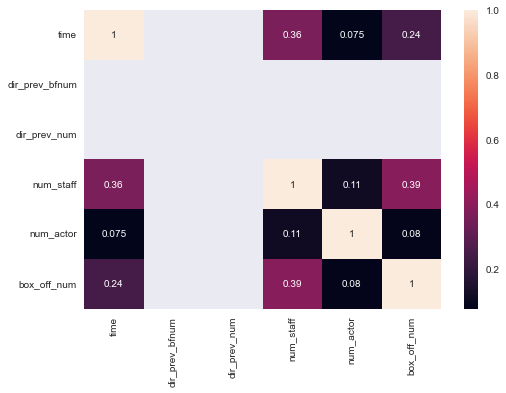

In [116]:
sns.heatmap(train.corr(), annot=True)

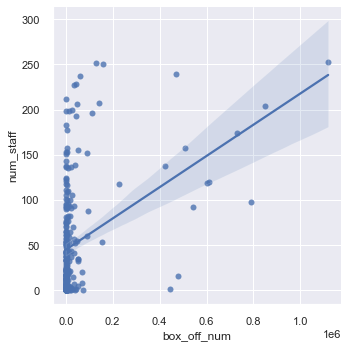

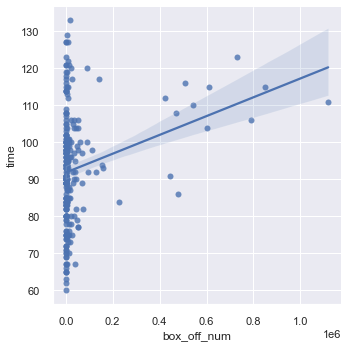

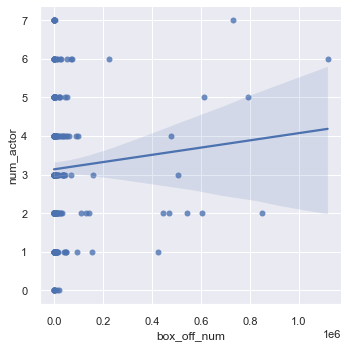

In [117]:
sns.set_theme()
sns.lmplot(data=train, x="box_off_num", y="num_staff")
sns.lmplot(data=train, x="box_off_num", y="time")
sns.lmplot(data=train, x="box_off_num", y="num_actor")

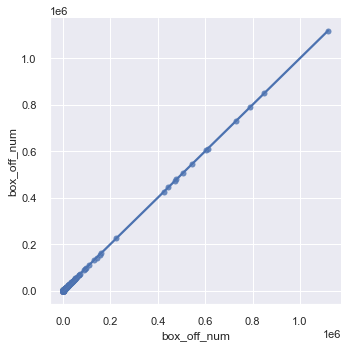

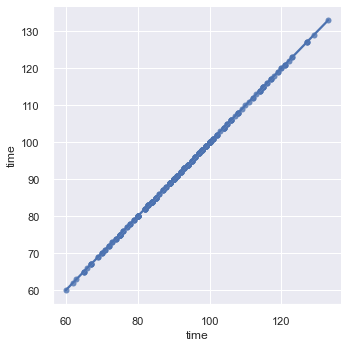

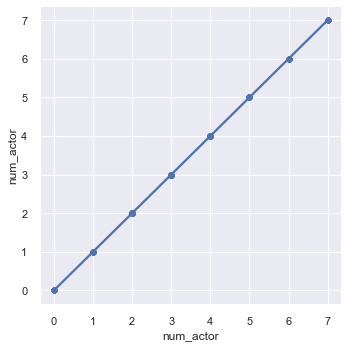

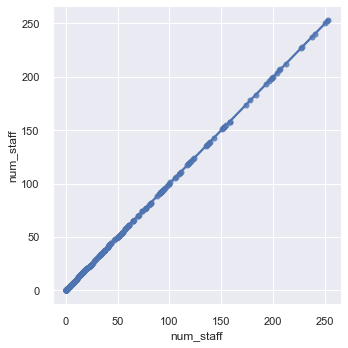

In [118]:
sns.lmplot(data=train, x="box_off_num", y="box_off_num")
sns.lmplot(data=train, x="time", y="time")
sns.lmplot(data=train, x="num_actor", y="num_actor")
sns.lmplot(data=train, x="num_staff", y="num_staff")

In [119]:
train.dir_prev_bfnum.fillna(0, inplace=True) #결측값 0으로 변경
test.dir_prev_bfnum.fillna(0, inplace=True)

In [120]:
train.dir_prev_num.fillna(0, inplace=True) #결측값 0으로 변경
test.dir_prev_num.fillna(0, inplace=True)

In [129]:
train[train['box_off_num'] > 1000000]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
254,특수본,롯데엔터테인먼트,액션,2011-11-24,111,15세 관람가,황병국,0.0,0,253,6,1118258


In [124]:
condition = (train['box_off_num'] > 800000) &  (train['num_staff'] < 250)
train[condition]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
82,만추,보람엔터테인먼트,드라마,2011-02-17,115,15세 관람가,김태용,0.0,0,204,2,849635


In [ ]:
train.drop(31, inplace=True)

In [ ]:
sns.lmplot(data=train, x="box_off_num", y="num_staff")

In [ ]:
train.tail(50)

데이터 병합

In [ ]:
train = pd.merge(train, test, how = 'left')

In [ ]:
test = pd.merge(test, test, how = 'left')

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [ ]:
test.fillna(0, inplace = True)

모델링 데이터 구성

In [ ]:
X = train[['num_staff']]
y = np.log1p(train.box_off_num)

In [ ]:
target = test[['num_staff']]

In [ ]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

In [ ]:
X = train

In [ ]:
y = test

모델

In [ ]:
xgb = XGBRegressor(random_state = 100)

In [ ]:
rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

In [ ]:
np.mean(rmse_list)

In [ ]:
train.filter(items = ['box_off_num', 'num_staff'])

In [ ]:
submission['box_off_num'] = (xgb_pred)

In [ ]:
submission.sort_values(by = 'box_off_num')

In [ ]:
submission

In [ ]:
submission.to_csv('second_movies.csv',index = False)